In [15]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

In [16]:
def rargmax(vector):
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)

In [17]:
env = gym.make('FrozenLake-v0')

[2017-03-20 14:31:29,607] Making new env: FrozenLake-v0


Success rate: 0.7545
Final Q-Table Values
        LEFT             DOWN              RIGHT             UP
[[  2.19722066e-02   7.12917315e-01   2.04886565e-02   8.84461253e-03]
 [  6.23850892e-03   1.28688975e-03   1.85218553e-03   6.37723179e-01]
 [  0.00000000e+00   6.32531414e-03   0.00000000e+00   3.55764179e-01]
 [  3.70521460e-03   1.16496220e-03   1.18502195e-03   2.59155812e-01]
 [  5.90566003e-01   2.50774295e-03   4.47013004e-04   2.58611250e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  3.95241887e-01   1.26542499e-11   8.91912876e-04   2.74932595e-08]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  3.22755588e-03   4.70272586e-03   2.89710606e-03   8.75623895e-01]
 [  2.67313022e-03   9.02727136e-01   2.81927908e-03   1.89831197e-03]
 [  8.58371491e-01   2.15310944e-04   0.00000000e+00   2.55624128e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00

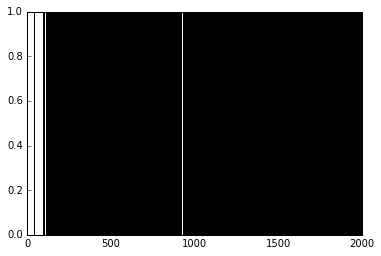

In [23]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

num_episodes = 2000
dis = .99
learning_rate = .85

rList = []
for i in range(num_episodes):
    state = env.reset()
    rAll = 0
    done = False
    
    while not done:
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n)/(i+1))
            
        new_state, reward, done,_ = env.step(action)
        Q[state,action] = (1-learning_rate) * Q[state,action] + learning_rate * (reward + dis * np.max(Q[new_state,:]))
        rAll += reward
        state = new_state
        
    rList.append(rAll)

print("Success rate: " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("        LEFT             DOWN              RIGHT             UP")
print(Q) 
plt.bar(range(len(rList)), rList, color="blue")
plt.show()
        